In [207]:
import tensorflow as tf
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [208]:
from emnist import list_datasets
list_datasets()

['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']

In [209]:
from emnist import extract_training_samples
x_train, y_train = extract_training_samples('letters')

x_train = x_train.astype("float32") / 255

In [210]:
from emnist import extract_test_samples
x_test, y_test = extract_test_samples('letters')

x_test = x_test.astype("float32") / 255


In [211]:
def resizeimg(img, tosize=(32,32)):
    res = cv.resize(img, dsize=tosize)
    res = np.expand_dims(res, -1)
    return res

In [212]:
x_train_new = []
x_test_new = []

In [213]:
for img in x_train:
    x_train_new.append(resizeimg(img))

In [214]:
for img in x_test:
    x_test_new.append(resizeimg(img))

In [215]:
x_train_new = np.array(x_train_new)
x_test_new = np.array(x_test_new)

In [216]:
x_train_new.shape

(124800, 32, 32, 1)

In [217]:
y_train.shape

(124800,)

In [218]:
y_train_new = tf.keras.utils.to_categorical(y_train)
y_test_new = tf.keras.utils.to_categorical(y_test)

In [219]:
num_classes = 27

In [220]:
y_train_new

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [221]:
new_model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=(32,32,1)),
        tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

In [234]:
batch_size = 128
epochs = 10

new_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

new_model.fit(x_train_new, y_train_new, batch_size=batch_size, epochs=epochs, validation_data=(x_test_new, y_test_new))

Epoch 1/10
975/975 [==============================] - 7s 7ms/step - loss: 0.1980 - accuracy: 0.9320 - val_loss: 0.1972 - val_accuracy: 0.9376
Epoch 2/10
975/975 [==============================] - 6s 7ms/step - loss: 0.1956 - accuracy: 0.9324 - val_loss: 0.1919 - val_accuracy: 0.9389
Epoch 3/10
975/975 [==============================] - 6s 7ms/step - loss: 0.1940 - accuracy: 0.9334 - val_loss: 0.1919 - val_accuracy: 0.9401
Epoch 4/10
975/975 [==============================] - 6s 7ms/step - loss: 0.1927 - accuracy: 0.9341 - val_loss: 0.1936 - val_accuracy: 0.9391
Epoch 5/10
975/975 [==============================] - 6s 7ms/step - loss: 0.1885 - accuracy: 0.9352 - val_loss: 0.1927 - val_accuracy: 0.9388
Epoch 6/10
975/975 [==============================] - 7s 7ms/step - loss: 0.1878 - accuracy: 0.9347 - val_loss: 0.1893 - val_accuracy: 0.9410
Epoch 7/10
975/975 [==============================] - 7s 7ms/step - loss: 0.1884 - accuracy: 0.9345 - val_loss: 0.1924 - val_accuracy: 0.9400
Epoch 

In [236]:
new_model.evaluate(x_test_new, y_test_new)

650/650 [==============================] - 3s 5ms/step - loss: 0.1927 - accuracy: 0.9401


[0.1926797330379486, 0.9401442408561707]

In [227]:
predictions = new_model.predict(x_test_new)

In [228]:
alphabet_string = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

q


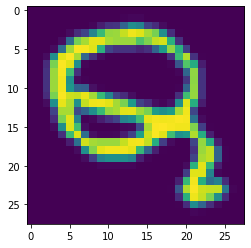

In [239]:
i = 12900
print(alphabet_string[np.argmax(predictions[i])-1])
plt.imshow(x_test[i])
plt.show()
